In [57]:
def calculate_ppv(df, modality_name):
    """
    Calculate PPV for a given imaging modality
    
    Parameters:
    df: pandas DataFrame containing the imaging data
    modality_name: str, name of the modality (e.g., 'SPECT/CT', 'Sestamibi', '4D CT Scan')
    
    Returns:
    tuple: (ppv, true_positives, total_localized)
    """
    # Initialize the concordance column name
    concordance_col = f"{modality_name} Calculated Concordance"
    
    # Filter for localized results (not NaN and not Non-localizing)
    localized_data = df[df[modality_name].notna() & (df[modality_name] != 'Non-localizing')]
    
    # Count true positives (Yes Exact or Yes Side)
    true_positives = len(df[df[concordance_col].isin(['Yes (Exact)', 'Yes (Side)'])])
    
    # Get total localized cases
    total_localized = len(localized_data)
    
    # Calculate PPV (avoid division by zero)
    if total_localized == 0:
        return None, 0, 0
    
    ppv = (true_positives / total_localized)
    return ppv, true_positives, total_localized


In [58]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
data = pd.read_excel("Data/Clean_imaging_data.xlsx")

# List of modalities to analyze
modalities = ['SPECT/CT', 'Sestamibi', '4D CT Scan', 'Ultrasound', 'MRI']

# Create results table
results = []
for modality in modalities:
    ppv, true_pos, total = calculate_ppv(data, modality)
    if ppv is not None:
        results.append({
            'Modality': modality,
            'PPV': f"{ppv*100:.1f}%",
            'True Positives': true_pos,
            'Total Localized': total,
            'False Positives': total - true_pos  # Added this for clarity
        })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print("\nPPV Results by Modality:")
results_df



PPV Results by Modality:


,Modality,PPV,True Positives,Total Localized,False Positives
0,SPECT/CT,91.6%,163,178,15
1,Sestamibi,99.1%,112,113,1
2,4D CT Scan,84.4%,146,173,27
3,Ultrasound,85.9%,67,78,11
4,MRI,75.0%,6,8,2


# Positive Predictive Value Analysis for Imaging Modalities

## Introduction to PPV in Medical Imaging

Positive Predictive Value (PPV) is a key metric in medical imaging that tells us how reliable a positive test result is. It answers the question: "When the test says there's something there, how often is it actually there?"

PPV is calculated as:
```
PPV = (True Positives) / (True Positives + False Positives)
```

- True Positives: Exact, Side, or Partial matches
- False Positives: Incorrect Localization
- Outputs total localized scans, match counts, and PPV %.

PPV works together with the other metrics we have:
- Sensitivity tells us how good a test is at finding actual problems
- Modality concordance looks at when different imaging methods agree with each other

For parathyroid imaging, high PPV means we can trust positive findings to guide surgery. When multiple imaging methods agree (concordance), it often increases our confidence in the results.


Import

In [59]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading Data

In [60]:
# Read the data
data = pd.read_excel("Data/Clean_imaging_data.xlsx")

In [61]:
# Print column names and first few rows
print("Column names:")
print(data.columns.tolist())
print("\nFirst few rows:")
print(data.head())

Column names:
['Date of Procedure', 'Patient ID', 'Age', 'Gender', 'Surgical Findings', 'Surgical Cure', 'SPECT/CT', 'Ultrasound', '4D CT Scan', 'Sestamibi', 'MRI', 'SPECT/CT Calculated Concordance', '4D CT Scan Calculated Concordance', 'Ultrasound Calculated Concordance', 'Sestamibi Calculated Concordance', 'MRI Calculated Concordance', 'Surgical Side']

First few rows:
  Date of Procedure  Patient ID  Age Gender              Surgical Findings  \
0        2012-04-24      156895   77      F                 Right Inferior   
1        2012-05-08      182059   70      F                  Left Inferior   
2        2012-05-22      150593   65      F                  Left Inferior   
3        2012-07-03      183346   69      F  Left Superior, Right Superior   
4        2012-07-18      183255   74      F                  Left Superior   

  Surgical Cure SPECT/CT      Ultrasound 4D CT Scan       Sestamibi  \
0           Yes      NaN             NaN        NaN  Right Inferior   
1           Yes

## 1. SPECT/CT Analysis

Analysis Steps:
1. Filter data for SPECT/CT results
2. Count true positives (correctly identified glands) and false positives (incorrect identifications)
3. Calculate PPV to see how reliable positive SPECT/CT findings are
4. Create visualization of results


SPECT/CT Analysis:
Total Localized Scans: 178
True Positives: 163
PPV: 91.57%


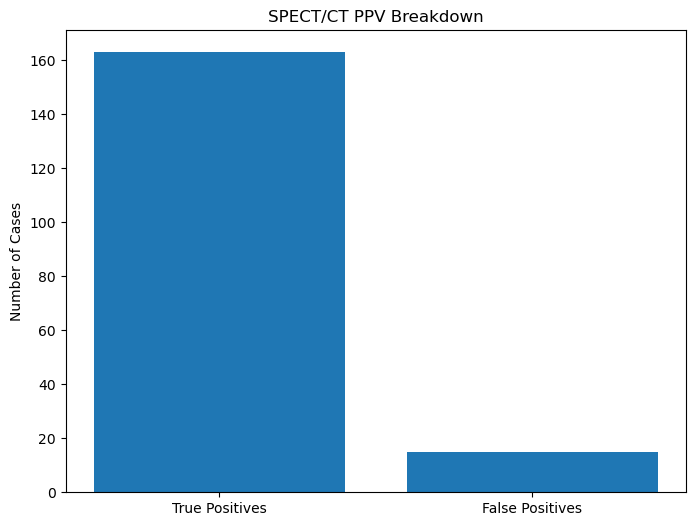

In [62]:
# SPECT/CT PPV Analysis

# Filter for SPECT/CT results (exclude NaN and Non-localizing)
spect_ct_data = data[data['SPECT/CT'].notna() & (data['SPECT/CT'] != 'Non-localizing')]

# Count matches
spect_ct_true_pos = len(data[data['SPECT/CT Calculated Concordance'].str.contains('Yes', na=False)])
spect_ct_total = len(spect_ct_data)

# Calculate PPV
spect_ct_ppv = (spect_ct_true_pos / spect_ct_total) * 100 if spect_ct_total > 0 else 0

# Create summary
print(f"SPECT/CT Analysis:")
print(f"Total Localized Scans: {spect_ct_total}")
print(f"True Positives: {spect_ct_true_pos}")
print(f"PPV: {spect_ct_ppv:.2f}%")

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(['True Positives', 'False Positives'], 
        [spect_ct_true_pos, spect_ct_total - spect_ct_true_pos])
plt.title('SPECT/CT PPV Breakdown')
plt.ylabel('Number of Cases')
plt.show()

## 2. SPECT/CT + Sestamibi Concordance Analysis

Analysis Steps:
1. Find cases where both SPECT/CT and Sestamibi tests were performed
2. Identify concordant results (when both tests point to the same location)
3. Calculate PPV for these concordant cases to see if agreement improves accuracy
4. Create visualization comparing concordant vs. single-modality results


Concordance Analysis:
Total Concordant Cases: 5
True Positives: 5
PPV: 100.00%


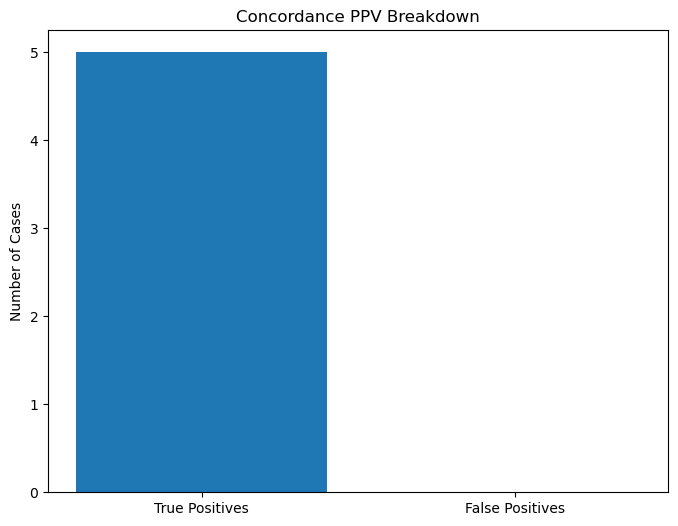

In [63]:
# SPECT/CT + Sestamibi Concordance Analysis

# Find cases where both tests were done and localized
concordant_cases = data[
    (data['SPECT/CT'].notna()) & 
    (data['Sestamibi'].notna()) &
    (data['SPECT/CT'] != 'Non-localizing') &
    (data['Sestamibi'] != 'Non-localizing')
]

# Find cases where they agree (both have Yes in Calculated Concordance)
concordant_true_pos = len(concordant_cases[
    (concordant_cases['SPECT/CT Calculated Concordance'].str.contains('Yes', na=False)) &
    (concordant_cases['Sestamibi Calculated Concordance'].str.contains('Yes', na=False))
])
concordant_total = len(concordant_cases)

# Calculate PPV
concordant_ppv = (concordant_true_pos / concordant_total) * 100 if concordant_total > 0 else 0

# Create summary
print(f"Concordance Analysis:")
print(f"Total Concordant Cases: {concordant_total}")
print(f"True Positives: {concordant_true_pos}")
print(f"PPV: {concordant_ppv:.2f}%")

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(['True Positives', 'False Positives'], 
        [concordant_true_pos, concordant_total - concordant_true_pos])
plt.title('Concordance PPV Breakdown')
plt.ylabel('Number of Cases')
plt.show()

## 3. Sestamibi Analysis

Analysis Steps:
1. Isolate Sestamibi scan results from our dataset
2. Count true positives (confirmed parathyroid tissue) and false positives (other tissue types)
3. Calculate PPV to determine how often positive Sestamibi findings are correct
4. Create visualization of Sestamibi performance


Sestamibi Analysis:
Total Localized Scans: 113
True Positives: 112
PPV: 99.12%


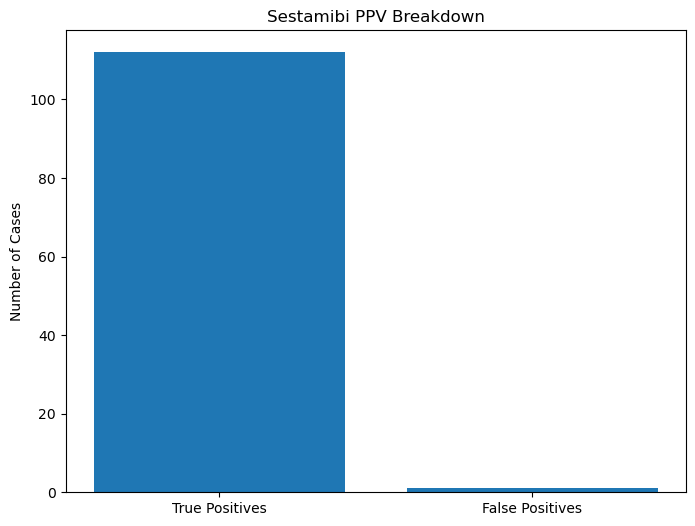

In [64]:
# Sestamibi PPV Analysis

# Filter for Sestamibi results (exclude NaN and Non-localizing)
sestamibi_data = data[data['Sestamibi'].notna() & (data['Sestamibi'] != 'Non-localizing')]

# Count matches
sestamibi_true_pos = len(data[data['Sestamibi Calculated Concordance'].str.contains('Yes', na=False)])
sestamibi_total = len(sestamibi_data)

# Calculate PPV
sestamibi_ppv = (sestamibi_true_pos / sestamibi_total) * 100 if sestamibi_total > 0 else 0

# Create summary
print(f"Sestamibi Analysis:")
print(f"Total Localized Scans: {sestamibi_total}")
print(f"True Positives: {sestamibi_true_pos}")
print(f"PPV: {sestamibi_ppv:.2f}%")

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(['True Positives', 'False Positives'], 
        [sestamibi_true_pos, sestamibi_total - sestamibi_true_pos])
plt.title('Sestamibi PPV Breakdown')
plt.ylabel('Number of Cases')
plt.show()

## 4. 4D CT Analysis

Analysis Steps:
1. Extract all 4D CT results from our dataset
2. Identify true positives (actual parathyroid glands) and false positives (other tissues)
3. Calculate PPV to assess the reliability of positive 4D CT findings
4. Create visualization showing 4D CT performance metrics


4D CT Analysis:
Total Localized Scans: 173
True Positives: 146
PPV: 84.39%


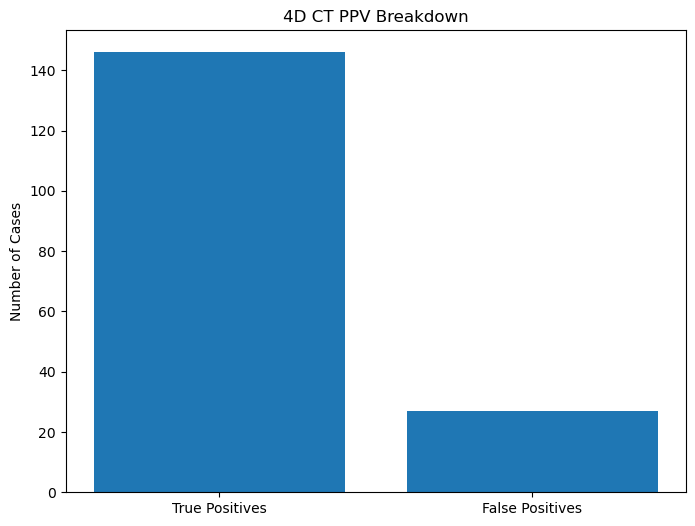

In [65]:
# 4D CT PPV Analysis

# Filter for 4D CT results (exclude NaN and Non-localizing)
ct_data = data[data['4D CT Scan'].notna() & (data['4D CT Scan'] != 'Non-localizing')]

# Count matches
ct_true_pos = len(data[data['4D CT Scan Calculated Concordance'].str.contains('Yes', na=False)])
ct_total = len(ct_data)

# Calculate PPV
ct_ppv = (ct_true_pos / ct_total) * 100 if ct_total > 0 else 0

# Create summary
print(f"4D CT Analysis:")
print(f"Total Localized Scans: {ct_total}")
print(f"True Positives: {ct_true_pos}")
print(f"PPV: {ct_ppv:.2f}%")

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(['True Positives', 'False Positives'], 
        [ct_true_pos, ct_total - ct_true_pos])
plt.title('4D CT PPV Breakdown')
plt.ylabel('Number of Cases')
plt.show()

## 5. Combined Analysis of All Modalities

Analysis Steps:
1. Collect PPV results from all imaging methods (SPECT/CT, Sestamibi, 4D CT, and concordant findings)
2. Create a comparison table showing PPV, sample sizes, and confidence intervals
3. Make a bar chart to visually compare PPVs across methods
4. Perform statistical tests to see if some methods are significantly better than others
5. Write a summary of key findings and potential clinical implications



Comparison of All Methods:
  Imaging Method     PPV (%)  Total Cases  True Positives
0       SPECT/CT   91.573034          178             163
1      Sestamibi   99.115044          113             112
2          4D CT   84.393064          173             146
3     Concordant  100.000000            5               5


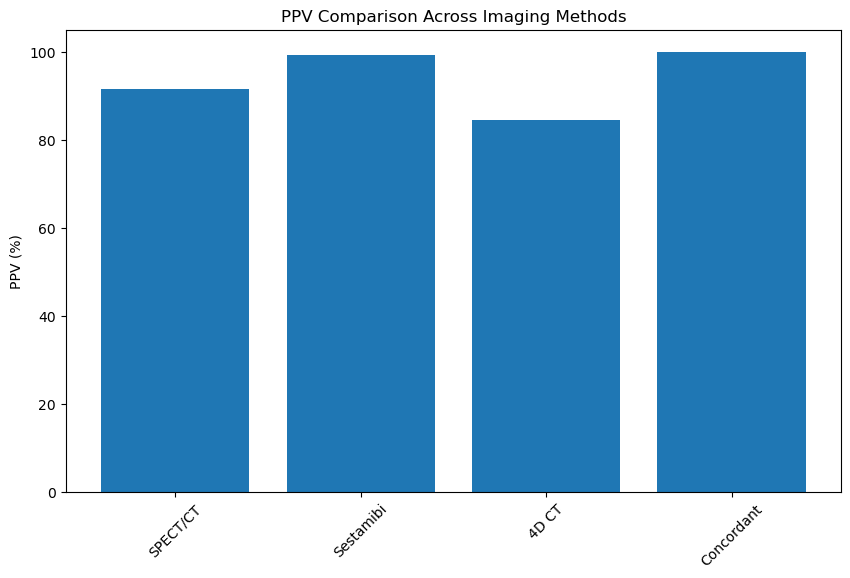

In [66]:
# Store all results
results = {
    'SPECT/CT': {'ppv': spect_ct_ppv, 'total': spect_ct_total, 'true_pos': spect_ct_true_pos},
    'Sestamibi': {'ppv': sestamibi_ppv, 'total': sestamibi_total, 'true_pos': sestamibi_true_pos},
    '4D CT': {'ppv': ct_ppv, 'total': ct_total, 'true_pos': ct_true_pos},
    'Concordant': {'ppv': concordant_ppv, 'total': concordant_total, 'true_pos': concordant_true_pos}
}

# Create comparison dataframe
ppv_comparison = pd.DataFrame({
    'Imaging Method': list(results.keys()),
    'PPV (%)': [results[method]['ppv'] for method in results],
    'Total Cases': [results[method]['total'] for method in results],
    'True Positives': [results[method]['true_pos'] for method in results]
})

# Display table
print("\nComparison of All Methods:")
print(ppv_comparison)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(ppv_comparison['Imaging Method'], ppv_comparison['PPV (%)'])
plt.title('PPV Comparison Across Imaging Methods')
plt.ylabel('PPV (%)')
plt.xticks(rotation=45)
plt.show()